In [57]:
import pandas as pd
import numpy as np
import re
import string
import nltk

In [58]:
import pythainlp as pythai
pythai.__version__

'4.0.2'

In [59]:
from pythainlp.util import normalize
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from pythainlp import Tokenizer
from nltk.tokenize import word_tokenize

In [60]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.


In [61]:
import demoji

In [62]:
data = pd.read_excel("D:/DATA3/data mining/real data.xlsx")
data

,ชื่อร้าน,product,รายละเอียดสินค้า,rating,ขายแล้ว,คอมเม้นท์,ราคา
0,Popular Roaster,Popular Coffee Roasters เมล็ดกาแฟคั่ว Brazil C...,𝐁𝐫𝐚𝐳𝐢𝐥 𝐂𝐞𝐫𝐫𝐚𝐝𝐨 𝐉𝐚𝐠𝐮𝐚𝐫\nกาแฟ บราซิล เซอร์ราโด ...,20.2พัน\n,60.1พัน,กาแฟหอมทะลุถุงทุกตัวแต่ละตัวมีเอกลักษณ์แตกต่าง...,160-580
1,PangKhon Coffee Roaster,เมล็ดกาแฟดอยปางขอน AA🔥🔥 คั่วใหม่ทุก order,เมล็ดกาแฟจากดอยปางขอนเชียงราย สายพันธุ์อาราบิก...,24.10พัน,76.3พัน,\nยังคงรักษาคุณภาพอย่างสม่ำเสมอ กาแฟหอม รสชาติ...,160-550
2,Vacsac_Shop,เมล็ดกาแฟคั่ว Arabica100% ☕ 1 กิโลกรัม ☕ 🌈ขอคั...,📢 📢📢อาจจะใช้เวลาในการจัดส่งนานกว่าปกติ 3-4 วัน...,44พัน,123.8พัน,เม็ดเล็กแต่อร่อย รสชาติดี หอมมาก คั่วสดใหม่ ถุ...,198
3,SunShineCoffee,เมล็ดกาแฟคั่ว Arabica 100% ☕ ขนาด 500 กรัม ☕ 🌈...,😊 กรุณาอย่าหักคะแนนร้าน เพราะความล่าช้าของบริษ...,7.5พัน,20พัน,เมล็ดกาแฟคั่วกลางเข้มบดละเอียด 500 กรัม เมล็ด...,118
4,THREE BEANS,เมล็ดกาแฟดอยช้าง เมล็ดกาแฟอราบิก้า100 % เมล็ดก...,เมล็ดกาแฟดอยช้างดอยช้างของแท้\nเมล็ดกาแฟอราบิก...,3.8พัน,12.3พัน,กลมกล่อม นุ่มคอ หอมมาก คุณภาพดีมาก ดีต่อใจ,109
5,Khobkhunkhrap.roastery,เมล็ดกาแฟปางขอน คั่วเข้ม ขนาด 1 kg เมล็ดกาแฟคั...,กาแฟปางขอน01 ตัวธรรมดา\n▪️ single origin \nOri...,1.1พัน,5.3พัน,กาแฟรสชาติดี สู้นม หอม ราคากันเองมาก คุณภาพเก...,280-290
6,MungmeeCoffee,Mungmee Coffee เมล็ดกาแฟ คั่วกลาง Brazil santo...,เมล็ดกาแฟคั่วกลาง Brazil santos ขนาด200กรัม\n*...,2.3พัน,6.2พัน,หอมฟุ้งชวนดื่มตั้งแต่ตอนบด ชงแล้วหอมกรุ่นมาก,฿180 - ฿700
7,Bluekoff Rayong,Bluekoff เมล็ดกาแฟอาราบิก้า100% คั่วเข้ม (250g),เมล็ดกาแฟอาราบิก้า 100%คัดเกรดพรีเมี่ยม จากดอย...,7.6พัน,33.9,รสชาติอร่อย หอม เข้มข้น ถูกใจในรสชาติมาก,฿155
8,smile_coffee,เมล็ดกาแฟคั่ว โรบัสต้าชุมพร 500กรัม,❗#กาแฟโรบัสต้า คั่วใหม่ๆทุกวัน..👉 ย้ำ ‼️👉โปร เ...,4พัน\n,13.7พัน,รสชาติกาแฟดี หอมเข้ม,฿160
9,RATIKA ราติก้า,Ratika | เมล็ดกาแฟคั่ว Ratika Coffee Robusta :...,กาแฟราติก้า โรบัสต้าแท้ 100% -\n• กาแฟโรบัสต้า...,4.8พัน,14.13พัน\n,รสชาติดีเข้ม มีกลิ่นหอมที่ดี คั่วใหม่ๆ ชงแล้ว...,฿85 - ฿160


# CHECK DATA

In [63]:
data.info() #เพื่อดูข้อมูลเกี่ยวกับชนิดของข้อมูลในแต่ละคอลัมน์.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ชื่อร้าน          10 non-null     object
 1   product           10 non-null     object
 2   รายละเอียดสินค้า  10 non-null     object
 3   rating            10 non-null     object
 4   ขายแล้ว           10 non-null     object
 5   คอมเม้นท์         10 non-null     object
 6   ราคา              10 non-null     object
dtypes: object(7)
memory usage: 688.0+ bytes


In [64]:
# data['ชื่อร้าน'] = data['ชื่อร้าน'].astype(str)
# data['product'] = data['product'].astype(str)
# data['รายละเอียดสินค้า'] = data['รายละเอียดสินค้า'].astype(str)
# data['คอมเม้นท์'] = data['คอมเม้นท์'].astype(str)

In [65]:
# data.info() #เพื่อดูข้อมูลเกี่ยวกับชนิดของข้อมูลในแต่ละคอลัมน์.

In [66]:
data.describe() #เพื่อดูสถิติพื้นฐานของข้อมูล

,ชื่อร้าน,product,รายละเอียดสินค้า,rating,ขายแล้ว,คอมเม้นท์,ราคา
count,10,10,10,10,10,10,10
unique,10,10,10,10,10,10,10
top,Popular Roaster,Popular Coffee Roasters เมล็ดกาแฟคั่ว Brazil C...,𝐁𝐫𝐚𝐳𝐢𝐥 𝐂𝐞𝐫𝐫𝐚𝐝𝐨 𝐉𝐚𝐠𝐮𝐚𝐫\nกาแฟ บราซิล เซอร์ราโด ...,20.2พัน\n,60.1พัน,กาแฟหอมทะลุถุงทุกตัวแต่ละตัวมีเอกลักษณ์แตกต่าง...,160-580
freq,1,1,1,1,1,1,1


# ผลลัพธ์ที่คุณได้จาก data.describe() นั้นไม่ใช่สถิติพื้นฐานของข้อมูล
แต่เป็นข้อมูลเกี่ยวกับค่า count, unique, top, และ freq 
ของแต่ละคอลัมน์ที่มีข้อมูลประเภท object (ข้อความหรือข้อความผสมกับตัวเลข).
ตัวอย่างผลลัพธ์ดังกล่าวแสดงข้อมูลเกี่ยวกับคอลัมน์
'ชื่อร้าน', 'product', 'รายละเอียดสินค้า', 'rating', 'ขายแล้ว', 'คอมเม้นท์', และ 'ราคา' 
ของ DataFrame ของคุณ:

count: แสดงจำนวนข้อมูลที่ไม่หาย (non-null) ในแต่ละคอลัมน์
unique: แสดงจำนวนค่าที่ไม่ซ้ำกัน (unique values) ในแต่ละคอลัมน์
top: แสดงค่าที่ปรากฎบ่อยที่สุด (most frequent value) ในแต่ละคอลัมน์
freq: แสดงความถี่ของค่าที่ปรากฎบ่อยที่สุด(frequency of the most frequent value)ในแต่ละคอลัมน์
ดังนั้น, ผลลัพธ์ด้านบนบอกว่าแต่ละคอลัมน์มีข้อมูลทั้งหมด 10 แถว 
และไม่มีค่าที่ซ้ำกันในแต่ละคอลัมน์ (unique = 10) และค่าที่ปรากฎบ่อยที่สุดคือค่าเดียวกันใน
แต่ละคอลัมน์ (top). ความถี่ (freq) แสดงว่าค่าที่ปรากฎบ่อยที่สุดปรากฎครั้งเดียว (freq = 1) 
ในแต่ละคอลัมน์ นั่นหมายความว่าค่าที่ปรากฎบ่อยที่สุดเป็นค่าเดียวกันทั้งหมดในแต่ละคอลัมน์ของ 
DataFrame ของคุณ.

# CLEAN

In [67]:
# ลบอิโมจิ
demoji.download_codes()  # Download the demoji code for emoji removal

C:\Users\alifs\AppData\Local\Temp/ipykernel_15148/66996307.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()  # Download the demoji code for emoji removal


In [68]:
# ลบอิโมจิ
def remove_emojis(text):
    if isinstance(text, str):
        return demoji.replace(text, repl="")
    return text 

data['รายละเอียดสินค้า'] = data['รายละเอียดสินค้า'].apply(remove_emojis)
data['product'] = data['product'].apply(remove_emojis)
# โหลดข้อมูลจากไฟล์ Excel ใหม่ที่พึ่งสร้าง
data.to_excel('D:/DATA3/data mining/coffee_no_emojis.xlsx', index=False)
file_path1 = 'D:/DATA3/data mining/coffee_no_emojis.xlsx'
data1 = pd.read_excel(file_path1)
data1.head()

,ชื่อร้าน,product,รายละเอียดสินค้า,rating,ขายแล้ว,คอมเม้นท์,ราคา
0,Popular Roaster,Popular Coffee Roasters เมล็ดกาแฟคั่ว Brazil C...,𝐁𝐫𝐚𝐳𝐢𝐥 𝐂𝐞𝐫𝐫𝐚𝐝𝐨 𝐉𝐚𝐠𝐮𝐚𝐫\nกาแฟ บราซิล เซอร์ราโด ...,20.2พัน\n,60.1พัน,กาแฟหอมทะลุถุงทุกตัวแต่ละตัวมีเอกลักษณ์แตกต่าง...,160-580
1,PangKhon Coffee Roaster,เมล็ดกาแฟดอยปางขอน AA คั่วใหม่ทุก order,เมล็ดกาแฟจากดอยปางขอนเชียงราย สายพันธุ์อาราบิก...,24.10พัน,76.3พัน,\nยังคงรักษาคุณภาพอย่างสม่ำเสมอ กาแฟหอม รสชาติ...,160-550
2,Vacsac_Shop,เมล็ดกาแฟคั่ว Arabica100% 1 กิโลกรัม ขอคั่วต...,อาจจะใช้เวลาในการจัดส่งนานกว่าปกติ 3-4 วัน ( ...,44พัน,123.8พัน,เม็ดเล็กแต่อร่อย รสชาติดี หอมมาก คั่วสดใหม่ ถุ...,198
3,SunShineCoffee,เมล็ดกาแฟคั่ว Arabica 100% ขนาด 500 กรัม ดอ...,กรุณาอย่าหักคะแนนร้าน เพราะความล่าช้าของบริษั...,7.5พัน,20พัน,เมล็ดกาแฟคั่วกลางเข้มบดละเอียด 500 กรัม เมล็ด...,118
4,THREE BEANS,เมล็ดกาแฟดอยช้าง เมล็ดกาแฟอราบิก้า100 % เมล็ดก...,เมล็ดกาแฟดอยช้างดอยช้างของแท้\nเมล็ดกาแฟอราบิก...,3.8พัน,12.3พัน,กลมกล่อม นุ่มคอ หอมมาก คุณภาพดีมาก ดีต่อใจ,109


In [69]:
# ตัดคำ  "\n" โดยใช้ tokenize
def remove_newline_and_tokenize(text):
    if isinstance(text, str):
        text = text.replace('\n', ' ')  # ลบ "\n" และแทนที่ด้วยช่องว่าง
        words = word_tokenize(text)
        return ' '.join(words)
    return text

data1 = data1.applymap(remove_newline_and_tokenize)
data1.head()

,ชื่อร้าน,product,รายละเอียดสินค้า,rating,ขายแล้ว,คอมเม้นท์,ราคา
0,Popular Roaster,Popular Coffee Roasters เมล็ดกาแฟคั่ว Brazil C...,𝐁𝐫𝐚𝐳𝐢𝐥 𝐂𝐞𝐫𝐫𝐚𝐝𝐨 𝐉𝐚𝐠𝐮𝐚𝐫 กาแฟ บราซิล เซอร์ราโด โด...,20.2พัน,60.1พัน,กาแฟหอมทะลุถุงทุกตัวแต่ละตัวมีเอกลักษณ์แตกต่าง...,160-580
1,PangKhon Coffee Roaster,เมล็ดกาแฟดอยปางขอน AA คั่วใหม่ทุก order,เมล็ดกาแฟจากดอยปางขอนเชียงราย สายพันธุ์อาราบิก...,24.10พัน,76.3พัน,ยังคงรักษาคุณภาพอย่างสม่ำเสมอ กาแฟหอม รสชาติเย...,160-550
2,Vacsac_Shop,เมล็ดกาแฟคั่ว Arabica100 % 1 กิโลกรัม ขอคั่วตา...,อาจจะใช้เวลาในการจัดส่งนานกว่าปกติ 3-4 วัน ( โ...,44พัน,123.8พัน,เม็ดเล็กแต่อร่อย รสชาติดี หอมมาก คั่วสดใหม่ ถุ...,198
3,SunShineCoffee,เมล็ดกาแฟคั่ว Arabica 100 % ขนาด 500 กรัม ดอยแ...,กรุณาอย่าหักคะแนนร้าน เพราะความล่าช้าของบริษัท...,7.5พัน,20พัน,เมล็ดกาแฟคั่วกลางเข้มบดละเอียด 500 กรัม เมล็ดก...,118
4,THREE BEANS,เมล็ดกาแฟดอยช้าง เมล็ดกาแฟอราบิก้า100 % เมล็ดก...,เมล็ดกาแฟดอยช้างดอยช้างของแท้ เมล็ดกาแฟอราบิก้...,3.8พัน,12.3พัน,กลมกล่อม นุ่มคอ หอมมาก คุณภาพดีมาก ดีต่อใจ,109


In [70]:
data.to_excel('D:/DATA3/data mining/coffee_no_newlines.xlsx', index=False)
file_path2 = 'D:/DATA3/data mining/coffee_no_newlines.xlsx'
data2 = pd.read_excel(file_path2)

In [71]:
# # ลบช่องว่างที่ไม่จำเป็น
# def remove_extra_spaces(text):
#     if isinstance(text, str):
#         return ' '.join(text.split())
#     return text

# data2 = data2.applymap(remove_extra_spaces)
# data2.head()

In [72]:
data.to_excel('D:/DATA3/data mining/coffee_cleaned.xlsx', index=False)
file_path3 = 'D:/DATA3/data mining/coffee_cleaned.xlsx'
data3 = pd.read_excel(file_path3)

In [73]:
# ลบคอลัมน์ที่ไม่เอา
columnremove = ['rating','ขายแล้ว','ราคา']

data3.drop(columnremove, axis=1, inplace=True)

In [74]:
data3.head()

,ชื่อร้าน,product,รายละเอียดสินค้า,คอมเม้นท์
0,Popular Roaster,Popular Coffee Roasters เมล็ดกาแฟคั่ว Brazil C...,𝐁𝐫𝐚𝐳𝐢𝐥 𝐂𝐞𝐫𝐫𝐚𝐝𝐨 𝐉𝐚𝐠𝐮𝐚𝐫\nกาแฟ บราซิล เซอร์ราโด ...,กาแฟหอมทะลุถุงทุกตัวแต่ละตัวมีเอกลักษณ์แตกต่าง...
1,PangKhon Coffee Roaster,เมล็ดกาแฟดอยปางขอน AA คั่วใหม่ทุก order,เมล็ดกาแฟจากดอยปางขอนเชียงราย สายพันธุ์อาราบิก...,\nยังคงรักษาคุณภาพอย่างสม่ำเสมอ กาแฟหอม รสชาติ...
2,Vacsac_Shop,เมล็ดกาแฟคั่ว Arabica100% 1 กิโลกรัม ขอคั่วต...,อาจจะใช้เวลาในการจัดส่งนานกว่าปกติ 3-4 วัน ( ...,เม็ดเล็กแต่อร่อย รสชาติดี หอมมาก คั่วสดใหม่ ถุ...
3,SunShineCoffee,เมล็ดกาแฟคั่ว Arabica 100% ขนาด 500 กรัม ดอ...,กรุณาอย่าหักคะแนนร้าน เพราะความล่าช้าของบริษั...,เมล็ดกาแฟคั่วกลางเข้มบดละเอียด 500 กรัม เมล็ด...
4,THREE BEANS,เมล็ดกาแฟดอยช้าง เมล็ดกาแฟอราบิก้า100 % เมล็ดก...,เมล็ดกาแฟดอยช้างดอยช้างของแท้\nเมล็ดกาแฟอราบิก...,กลมกล่อม นุ่มคอ หอมมาก คุณภาพดีมาก ดีต่อใจ


In [75]:
#ลบสัญลักษณ์ต่างๆ
def remove_special_symbols(text):
    # Define a regex pattern for special symbols
    pattern = re.compile(r'[!@#$^&*()_+{}\[\]:;<>,?~\\|' ' '  '-]')
    
    # Use the pattern to remove special symbols from the text
    cleaned_text = pattern.sub('', text)
    
    return cleaned_text

data3['ชื่อร้าน'] = data3['ชื่อร้าน'].apply(lambda x: remove_special_symbols(x) if isinstance(x, str) else x)
data3['รายละเอียดสินค้า'] = data3['รายละเอียดสินค้า'].apply(lambda x: remove_special_symbols(x) if isinstance(x, str) else x)
data3['product'] = data3['product'].apply(lambda x: remove_special_symbols(x) if isinstance(x, str) else x)

data3.head()

,ชื่อร้าน,product,รายละเอียดสินค้า,คอมเม้นท์
0,PopularRoaster,PopularCoffeeRoastersเมล็ดกาแฟคั่วBrazilCerrad...,𝐁𝐫𝐚𝐳𝐢𝐥𝐂𝐞𝐫𝐫𝐚𝐝𝐨𝐉𝐚𝐠𝐮𝐚𝐫\nกาแฟบราซิลเซอร์ราโดโดยทั่...,กาแฟหอมทะลุถุงทุกตัวแต่ละตัวมีเอกลักษณ์แตกต่าง...
1,PangKhonCoffeeRoaster,เมล็ดกาแฟดอยปางขอนAAคั่วใหม่ทุกorder,เมล็ดกาแฟจากดอยปางขอนเชียงรายสายพันธุ์อาราบิก้...,\nยังคงรักษาคุณภาพอย่างสม่ำเสมอ กาแฟหอม รสชาติ...
2,VacsacShop,เมล็ดกาแฟคั่วArabica100%1กิโลกรัมขอคั่วตามคิวอ...,อาจจะใช้เวลาในการจัดส่งนานกว่าปกติ34วันโดยทางข...,เม็ดเล็กแต่อร่อย รสชาติดี หอมมาก คั่วสดใหม่ ถุ...
3,SunShineCoffee,เมล็ดกาแฟคั่วArabica100%ขนาด500กรัมดอยแม่สลองค...,กรุณาอย่าหักคะแนนร้านเพราะความล่าช้าของบริษัทข...,เมล็ดกาแฟคั่วกลางเข้มบดละเอียด 500 กรัม เมล็ด...
4,THREEBEANS,เมล็ดกาแฟดอยช้างเมล็ดกาแฟอราบิก้า100%เมล็ดกาแฟ...,เมล็ดกาแฟดอยช้างดอยช้างของแท้\nเมล็ดกาแฟอราบิก...,กลมกล่อม นุ่มคอ หอมมาก คุณภาพดีมาก ดีต่อใจ


In [76]:
# ลบตัวอักษรพิเศษ
def clean(text):
    
    cleaned_text = re.sub(r'[^a-zA-Zก-๙ ]', '', text)
    return ''.join(cleaned_text)

data3['Cleaned'] = data3['รายละเอียดสินค้า'].apply(clean)

print("Cleaned:", data3['Cleaned'])


Cleaned: 0    กาแฟบราซิลเซอร์ราโดโดยทั่วไปแล้วตัวเมล็ดมีความ...
1    เมล็ดกาแฟจากดอยปางขอนเชียงรายสายพันธุ์อาราบิก้...
2    อาจจะใช้เวลาในการจัดส่งนานกว่าปกติวันโดยทางขนส...
3    กรุณาอย่าหักคะแนนร้านเพราะความล่าช้าของบริษัทข...
4    เมล็ดกาแฟดอยช้างดอยช้างของแท้เมล็ดกาแฟอราบิก้า...
5    กาแฟปางขอนตัวธรรมดาsingleoriginOriginChiangrai...
6    เมล็ดกาแฟคั่วกลางBrazilsantosขนาดกรัมบดฟรีและเ...
7    เมล็ดกาแฟอาราบิก้าคัดเกรดพรีเมี่ยมจากดอยช้างปล...
8    กาแฟโรบัสต้าคั่วใหม่ๆทุกวันย้ำโปรเก็บเงินปลายท...
9    กาแฟราติก้าโรบัสต้าแท้กาแฟโรบัสต้ารสชาติจัดจ้า...
Name: Cleaned, dtype: object


# TOKENIZATION

In [77]:
# แบ่งคำ
text = "กาแฟ บราซิล เซอร์ราโด  โดยทั่วไปแล้วตัวเมล็ดมีความสะอาดด้วยเนื้อครีมที่ดีค่ะ"

print("default dictionary:", word_tokenize(text))

words = set(thai_words())  
words.add("บราซิล")  
words.add("เซอร์ราโด")
words.add("เนื้อครีม") 
custom_tokenizer = Tokenizer(words)
print("custom dictionary :", custom_tokenizer.word_tokenize(text))

default dictionary: ['กาแฟ', 'บราซิล', 'เซอร์ราโด', 'โดยทั่วไปแล้วตัวเมล็ดมีความสะอาดด้วยเนื้อครีมที่ดีค่ะ']
custom dictionary : ['กาแฟ', ' ', 'บราซิล', ' ', 'เซอร์ราโด', '  ', 'โดยทั่วไปแล้ว', 'ตัว', 'เมล็ด', 'มี', 'ความสะอาด', 'ด้วย', 'เนื้อครีม', 'ที่', 'ดี', 'ค่ะ']


In [78]:
# # แบ่งคำ
# from pythainlp import word_tokenize

# # Define a function to tokenize the text into words
# def tokenize_into_words(text):
#     return word_tokenize(text)

# # Apply the word_tokenize function to the 'รายละเอียดสินค้า' column and store the result in a new column 'Tokenized'
# data3['Tokenizationรายละเอียดสินค้า'] = data3['รายละเอียดสินค้า'].apply(tokenize_into_words)

# # Now, 'Tokenized' is a new DataFrame column with tokenized words.
# print("Word Tokenization:", data3['Tokenizationรายละเอียดสินค้า'] )
# print(data3['Tokenizationรายละเอียดสินค้า'] )


In [79]:
# # กำหนดพจนานุกรมที่กำหนดเอง
# from pythainlp.tokenize import word_tokenize
# from pythainlp.corpus import thai_words
# from pythainlp.util.trie import dict_trie
# import re

# # เพิ่มคำที่คุณต้องการในพจนานุกรมเซต
# custom_words= {"เนื้อครีม"}
# custom_words= {"ราติก้า"}
# custom_words= {"𝐁𝐫𝐚𝐳𝐢𝐥"}
# custom_words= {"𝐂𝐞𝐫𝐫𝐚𝐝𝐨"}
# custom_words= {"𝐉𝐚𝐠𝐮𝐚𝐫"}
# custom_words= {"เซอร์ราโด"}
# custom_words= {"ปางขอน"}
# custom_words= {"ช้างดอย"}
# custom_words= {"single"}


# custom_words.update(thai_words_set)

# # ดึงข้อมูลจาก DataFrame
# data = data3['Tokenized']

# # ใช้การวนลูปเพื่อเพิ่มคำศัพท์ที่คุณต้องการในเซต
# for text in data:
#     # ดำเนินการตัดคำและเพิ่มคำศัพท์ในเซต custom_words
#     custom_words.update(tokenize_with_custom_dictionary(text))

# # แปลง custom_words เป็นเซตเพื่อลบคำที่ซ้ำ
# custom_words = set(custom_words)

# # สร้าง Trie จากคำศัพท์ที่คุณได้รวบรวม
# custom_dict_trie = dict_trie(thai_words_set)

# # สร้างฟังก์ชันในการตัดคำโดยใช้พจนานุกรมที่กำหนดเอง
# def tokenize_with_custom_dictionary(text):
#     tokens = word_tokenize(text, custom_dict=custom_dict_trie)
#     return [token.strip() for token in tokens if token.strip() != '']

# # # ตัดคำด้วยพจนานุกรมที่กำหนดเอง
# # data3['Tokenized'] = data3['รายละเอียดสินค้า'].apply(tokenize_with_custom_dictionary)
# # tokens = tokenize_with_custom_dictionary(data3['Tokenized'])
# # print(tokens)

# # สร้างรายการของข้อความที่ผ่านการตัดคำด้วยพจนานุกรมที่กำหนดเอง
# tokenized_data = data3['รายละเอียดสินค้า'].apply(tokenize_with_custom_dictionary)
# # รวมรายการของคำเป็นข้อความเดียวโดยใช้ช่องว่างเป็นตัวคั่น
# data3['Tokenized'] = tokenized_data.apply(','.join)
# print(data3['Tokenized'])


In [80]:
# แบ่งคำ
from pythainlp.util import normalize
from pythainlp.tokenize import word_tokenize

def tokenize_with_thai_dictionary(text):

    tokens = word_tokenize(text)
    return ','.join(tokens)

data3['Tokenized'] = data3['Cleaned'].apply(tokenize_with_thai_dictionary)

print("Thai Dictionary Tokenization:", data3['Tokenized'])


Thai Dictionary Tokenization: 0    กาแฟ,บราซิล,เซอร์,รา,โด,โดยทั่วไปแล้ว,ตัว,เมล็...
1    เมล็ด,กาแฟ,จาก,ดอย,ปาง,ขอน,เชียงราย,สายพันธุ์,...
2    อาจจะ,ใช้เวลา,ใน,การจัดส่ง,นาน,กว่า,ปกติ,วัน,โ...
3    กรุณา,อย่า,หักคะแนน,ร้าน,เพราะ,ความล่าช้า,ของ,...
4    เมล็ด,กาแฟ,ดอย,ช้าง,ดอย,ช้าง,ของแท้,เมล็ด,กาแฟ...
5    กาแฟ,ปาง,ขอน,ตัว,ธรรมดา,singleoriginOriginChia...
6    เมล็ด,กาแฟ,คั่ว,กลาง,Brazilsantos,ขนาด,กรัม,บด...
7    เมล็ด,กาแฟ,อาราบิก้า,คัด,เกรด,พรีเมี่ยม,จาก,ดอ...
8    กาแฟ,โรบัสต้า,คั่ว,ใหม่,ๆ,ทุกวัน,ย้ำ,โปร,เก็บ,...
9    กาแฟ,รา,ติ,ก้า,โรบัสต้า,แท้,กาแฟ,โรบัสต้า,รสชา...
Name: Tokenized, dtype: object


In [81]:
# # กำหนดพจนานุกรมที่กำหนดเอง 

# from pythainlp.tokenize import word_tokenize
# from pythainlp.tokenize import Trie

# # สร้าง Trie จากคำศัพท์ที่ต้องการเพิ่ม
# custom_dict = Trie(set(["เนื้อครีม", "ราติก้า", "𝐁𝐫𝐚𝐳𝐢𝐥", "𝐂𝐞𝐫𝐫𝐚𝐝𝐨", "𝐉𝐚𝐠𝐮𝐚𝐫", "เซอร์ราโด", "ปางขอน", "ดอยช้าง", "single"]))

# # แบ่งคำ
# def tokenize_with_thai_dictionary(text):

#     tokens = word_tokenize(text, custom_dict)
#     return ','.join(tokens)

# data3['Tokenize'] = data3['Tokenized'].apply(tokenize_with_thai_dictionary)

# print("Thai Dictionary Tokenization:", data3['Tokenize'])


In [82]:
# กำหนดพจนานุกรมที่กำหนดเอง
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import Trie

# Create a Trie from the words you want to add
custom_words = set(thai_words())
custom_words.add("โดย")
custom_words.add("ทั่วไป")
custom_words.add("แล้ว")
custom_words.add("ความ")
custom_words.add("𝐁𝐫𝐚𝐳𝐢𝐥")
custom_words.add("𝐂𝐞𝐫𝐫𝐚𝐝𝐨")
custom_words.add("𝐉𝐚𝐠𝐮𝐚𝐫")
custom_words.add("เซอร์ราโด")
custom_words.add("ปางขอน")
custom_words.add("ดอยช้าง")
custom_words.add("single")
custom_words.add("ราติก้า")
custom_words.add("origin")
custom_words.add("Origin")
custom_words.add("Chiangrai")
custom_words.add("Plant")
custom_words.add("Variety")
custom_words.add("Arabica")
custom_words.add("Altitude")
custom_words.add("masl")
custom_words.add("TasteNotes")
custom_words.add("Nutty")
custom_words.add("Chocolate")
custom_words.add("Earthy")
custom_words.add("Caramel")
custom_words.add("Character")
custom_words.add("Balanced")
custom_words.add("Good")
custom_words.add("mouth")
custom_words.add("feel")
custom_words.add("Body")


trie = Trie(custom_words)

# Create a custom tokenizer
from pythainlp.tokenize import Tokenizer

custom_tokenizer = Tokenizer(trie)

# Create a function for tokenization using the custom dictionary
def tokenize_with_custom_dictionary(text):
    return custom_tokenizer.word_tokenize(text)

# Apply the custom tokenizer to the 'รายละเอียดสินค้า' column and store the result in a new column 'Tokenized'
data3['Tokenizer'] = data3['Cleaned'].apply(tokenize_with_custom_dictionary)

# Now, 'Tokenized' is a new DataFrame column with tokenized words using the custom dictionary.
print("Custom Dictionary Tokenization:", data3['Tokenizer'])


Custom Dictionary Tokenization: 0    [กาแฟ, บราซิล, เซอร์ราโด, โดยทั่วไปแล้ว, ตัว, ...
1    [เมล็ด, กาแฟ, จาก, ดอย, ปางขอน, เชียงราย, สายพ...
2    [อาจจะ, ใช้เวลา, ใน, การจัดส่ง, นาน, กว่า, ปกต...
3    [กรุณา, อย่า, หักคะแนน, ร้าน, เพราะ, ความล่าช้...
4    [เมล็ด, กาแฟ, ดอยช้าง, ดอยช้าง, ของแท้, เมล็ด,...
5    [กาแฟ, ปางขอน, ตัว, ธรรมดา, single, origin, Or...
6    [เมล็ด, กาแฟ, คั่ว, กลาง, Brazilsantos, ขนาด, ...
7    [เมล็ด, กาแฟ, อาราบิก้า, คัด, เกรด, พรีเมี่ยม,...
8    [กาแฟ, โรบัสต้า, คั่ว, ใหม่, ๆ, ทุกวัน, ย้ำ, โ...
9    [กาแฟ, ราติก้า, โรบัสต้า, แท้, กาแฟ, โรบัสต้า,...
Name: Tokenizer, dtype: object


In [83]:
# # ตัดคำ  "\n" โดยใช้ tokenize
# def remove_newline_and_tokenize(text):
#     if isinstance(text, str):
#         text = text.replace('\n', ' ')  # ลบ "\n" และแทนที่ด้วยช่องว่าง
#         words = word_tokenize(text)
#         return ' '.join(words)
#     return text

# data1 = data3['Token'].applymap(remove_newline_and_tokenize)
# data1.head()

In [84]:
# # ลบช่องว่างที่ไม่จำเป็น
# data3['รายละเอียดสินค้า'] = data3['รายละเอียดสินค้า'].apply(lambda x: [word for word in x if word != ''])
# data3['รายละเอียดสินค้า']

In [85]:
#ลบคำที่ไม่จำเป็น
def thai_stopwords (tokens):
    filtered_tokens = [token for token in tokens if token not in pythai.corpus.common.thai_stopwords()]
    return filtered_tokens
data3['Token'] = data3['Tokenizer'].apply(thai_stopwords)

data3['Token']


0    [กาแฟ, บราซิล, เซอร์ราโด, โดยทั่วไปแล้ว, ตัว, ...
1    [เมล็ด, กาแฟ, ดอย, ปางขอน, เชียงราย, สายพันธุ์...
2    [ใช้เวลา, การจัดส่ง, ปกติ, ขนส่ง, ใช้เวลา, การ...
3    [กรุณา, อย่า, หักคะแนน, ร้าน, ความล่าช้า, บริษ...
4    [เมล็ด, กาแฟ, ดอยช้าง, ดอยช้าง, ของแท้, เมล็ด,...
5    [กาแฟ, ปางขอน, ตัว, ธรรมดา, single, origin, Or...
6    [เมล็ด, กาแฟ, คั่ว, กลาง, Brazilsantos, ขนาด, ...
7    [เมล็ด, กาแฟ, อาราบิก้า, คัด, เกรด, พรีเมี่ยม,...
8    [กาแฟ, โรบัสต้า, คั่ว, ย้ำ, โปร, เงิน, ปลายทาง...
9    [กาแฟ, ราติก้า, โรบัสต้า, กาแฟ, โรบัสต้า, รสชา...
Name: Token, dtype: object

In [86]:
# นับคำที่ไม่จำเป็นไป
def thai_stopwords(tokens):
    stopwords = [token for token in tokens if token in pythai.corpus.common.thai_stopwords()]
    filtered_tokens = [token for token in tokens if token not in pythai.corpus.common.thai_stopwords()]
    return filtered_tokens, stopwords

data3['Token'], data3['Stopwords'] = zip(*data3['Tokenizer'].apply(thai_stopwords))

# สร้างรายการtopwords
stopwords_list = [word for words in data3['Stopwords'] for word in words]

# แปลงรายการเป็นชุดเพื่อลบรายการที่ซ้ำกัน
stopwords_set = set(stopwords_list)

# แสดงคำหยุดที่ไม่ซ้ำใคร
print("Stopwords:", stopwords_set)


Stopwords: {'กับ', 'ทำไม', 'เดียว', 'ว่า', 'ใคร', 'แต่ละ', 'ที่สุด', 'เป็นต้น', 'เลย', 'รวม', 'ยืนยัน', 'คล้าย', 'ไม่', 'ต่อ', 'น้อย', 'ค่ะ', 'และ', 'นี่', 'มากกว่า', 'ต้อง', 'เอา', 'เพื่อ', 'นำมา', 'นั้นๆ', 'แท้', 'คะ', 'ไหน', 'ทั้งนี้', 'ง่าย', 'อื่นๆ', 'หลัง', 'ตลอด', 'เท่า', 'กำหนด', 'ไกล', 'เมื่อ', 'ก่อน', 'วัน', 'ส่วนใหญ่', 'ความ', 'นำ', 'เช่น', 'ทุกครั้ง', 'เพิ่มเติม', 'พอ', 'ยิ่งขึ้น', 'สูง', 'ตรง', 'แก่', 'ตาม', 'บน', 'คำ', 'ไป', 'ก่อนหน้า', 'เพื่อให้', 'เข้า', 'จาก', 'ส่ง', 'เคย', 'กว่า', 'หมด', 'เพิ่ม', 'นี้', 'เอง', 'แบบ', 'คราว', 'สำคัญ', 'ลง', 'ใน', 'ซึ่ง', 'ยัง', 'ทั้ง', 'เร็ว', 'ครบถ้วน', 'เท่าที่', 'ได้แก่', 'ถ้า', 'เนื่องจาก', 'กัน', 'ได้ที่', 'ครับ', 'เพียง', 'จัด', 'ทุกวัน', 'สุด', 'ช่วย', 'หาก', 'ให้', 'ใหญ่', 'โดย', 'อาจ', 'ยาวนาน', 'อะไร', 'ส่วน', 'เปลี่ยน', 'ใหม่', 'ยิ่ง', 'จะ', 'บ้าง', 'เริ่ม', 'ควร', 'ด้าน', 'รวดเร็ว', 'เกิน', 'เข้าใจ', 'เก็บ', 'สูงสุด', 'เชื่อ', 'ก็', 'จึง', 'อย่าง', 'ณ', 'ด้วย', 'นิดๆ', 'บาง', 'ยังคง', 'พยายาม', 'เกี่ยวกับ', 'ละ', 'ได้รับ', 

In [87]:
#ทั้งหมดกี่คำ
total_word_count = sum(data3.apply(len))
print("Total Word Count (after removing stopwords):", total_word_count, "Word")


Total Word Count (after removing stopwords): 90 Word


In [88]:
#คำไหนพบบ่อยสุดและมีกี่ครั้ง
from collections import Counter
all_words = [word for tokens in data3['Token'] for word in tokens if word != ' ']
 
word_freq = Counter(all_words)

most_common_word, frequency = word_freq.most_common(1)[0]
print(f"The most common word is '{most_common_word}' with a frequency of {frequency} times.")

The most common word is 'กาแฟ' with a frequency of 178 times.


In [93]:
# นับคำว่าคำไหนพบบ่อยและมีกี่ครั้ง
from collections import Counter
all_words = [word for tokens in data3['Token'] for word in tokens if word != ' ']
 
# Calculate word frequencies
word_freq = Counter(all_words)

print(word_freq.most_common(30))

[('กาแฟ', 178), ('คั่ว', 103), ('บด', 84), ('เมล็ด', 73), ('รสชาติ', 48), ('เครื่อง', 35), ('ลูกค้า', 32), ('ร้าน', 30), ('ชง', 25), ('เข้ม', 24), ('ชงกาแฟ', 22), ('หอม', 19), ('ถุง', 19), ('ระดับ', 18), ('กลิ่น', 18), ('สินค้า', 17), ('ดอยช้าง', 17), ('กลาง', 16), ('ละเอียด', 16), ('คุณภาพ', 15), ('ขนส่ง', 14), ('กลิ่นหอม', 13), ('ราคา', 13), ('ตัว', 12), ('ดี', 12), ('อ่อน', 12), ('เปรี้ยว', 12), ('กาแฟสด', 12), ('ละมุน', 11), ('Espresso', 11)]


In [94]:
# from pythai

In [95]:
# from pythainlp import pos_tag

# # โครงสร้างของประโยค
# def pos_tag_text(tokens):
#     tagged_tokens = pos_tag(tokens)
#     return tagged_tokens

Part-of-Speech (POS) tags ที่ใช้ในภาษาไทย (Thai POS tags) ดังนี้:

- NCMN (Noun Common): คำนามทั่วไป - ตัวอย่างเช่น "ครีม" และ "เซอร์" เป็นคำนามทั่วไปที่ไม่ต้องพิจารณาเพศหรือส่วนแสดงของคำนาม

- VACT (Verb Action): กริยาทำ - ตัวอย่างเช่น "ละมุน" เป็นคำกริยาที่แสดงการกระทำหรือการเคลื่อนไหว

- VATT (Verb Actor): กริยาที่มีตัวประกอบ - ตัวอย่างเช่น "กลาง" เป็นคำกริยาที่ระบุสถานะหรือลักษณะของการกระทำ

- JSBR (Josa Bound Noun): ตัวบ่งชี้คำนาม - ตัวอย่างเช่น "จ." ใช้เพื่อแสดงตัวบ่งชี้คำนาม

- PUNC (Punctuation): ความริบแรร - ตัวอย่างเช่น "/" เป็นเครื่องหมายวรรคตอน

- DCNM (Digit Card Numeral): ตัวเลขแบบประเภท - ตัวอย่างเช่น "100" เป็นตัวเลขแบบประเภท

In [96]:
# # โครงสร้างของคำและคำ
# for index, row in data3.iterrows():
#     print(f"Row {index}:")
#     for token, pos in row['Tokenized1']:
#         print(f"{token} ({pos})")
#     print()


# Word Cloud

In [97]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install pythainlp

Note: you may need to restart the kernel to use updated packages.


In [99]:
import matplotlib.font_manager

fonts = matplotlib.font_manager.findSystemFonts()

for font in fonts:
    try:
        font_properties = matplotlib.font_manager.FontProperties(fname=font)
        if "TrueType" in font_properties.get_name():
            print(f"รองรับ: {font}")
        else:
            print(f"ไม่รองรับ: {font}")
    except Exception as e:
        print(f"ผิดพลาด: {font}")


ไม่รองรับ: C:\WINDOWS\Fonts\NirmalaB.ttf
ไม่รองรับ: C:\Windows\Fonts\msuighub.ttf
ไม่รองรับ: C:\Windows\Fonts\upcki.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\corbelz.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\Candarab.ttf
ไม่รองรับ: C:\Users\alifs\AppData\Local\Microsoft\Windows\Fonts\NotoSansThai_SemiCondensed-Bold.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\constan.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\cour.ttf
ไม่รองรับ: C:\Windows\Fonts\constanb.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\Gabriola.ttf
ไม่รองรับ: C:\Windows\Fonts\upcdi.ttf
ไม่รองรับ: C:\Windows\Fonts\trebucbd.ttf
ไม่รองรับ: C:\Windows\Fonts\comicbd.ttf
ไม่รองรับ: C:\Windows\Fonts\simpbdo.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\trebucbd.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\comic.ttf
ไม่รองรับ: C:\Windows\Fonts\corbelli.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\georgiaz.ttf
ไม่รองรับ: C:\Windows\Fonts\arabtype.ttf
ไม่รองรับ: C:\WINDOWS\Fonts\msjhl.ttc
ไม่รองรับ: C:\WINDOWS\Fonts\msjhbd.ttc
ไม่รองรับ: C:\WINDOWS\Fonts\segoeprb.ttf
ไม่รองรับ: C:\Windows\Fonts\msjhl.ttc
ไม่รองรับ: C:\Windows\F

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [101]:
regexp = r"[ก-๙a-zA-Z']+"
text = "สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย สักวา หวาน อื่น มี หมื่น แสน ไม่ เหมือน แม้น พจมาน ที่ หวาน หอม กลิ่น ประเทียบ เปรียบ ดวง พวงพะยอม อาจ จะ น้อม จิต โน้ม ด้วย โลม ลม แม้น ล้อ ลาม หยาม หยาบ ไม่ ปลาบปลื้ม ดัง ดูด ดื่ม บอระเพ็ด ต้อง เข็ด ขม ผู้ดี ไพร่ ไม่ ประกอบ ชอบ อารมณ์ ใคร ฟัง ลม เมิน หน้า ระอา เอย"
plt.rcParams['font.family'] = 'D:/DATA3/data mining/MiPancake/MiPancake.ttf'
mask = np.array(Image.open("D:/DATA3/data mining/kopi.jpg"))
wordcloud = WordCloud(
                      font_path=path, 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      mask=mask,
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                    #   contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

NameError: name 'path' is not defined

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.corpus.common import thai_stopwords

# Define the font path for TH Sarabun font
font_path = "C:/Users/alifs/Downloads/TH-Sarabun-New/THSarabunNew.ttf"

# Create a WordCloud object with custom settings
wordcloud = WordCloud(
    font_path=font_path,
    stopwords=thai_stopwords(),
    relative_scaling=0.3,
    min_font_size=1,
    background_color="white",
    width=1024,
    height=768,
    max_words=500,
    colormap='plasma',
    scale=3,
    font_step=4,
    collocations=False,
    regexp=r"[ก-๙a-zA-Z']+",
    margin=2
)

# Ensure that 'Tokenized1' column contains strings
data3['wordcloud'] = data3['Token'].astype(str)

# Join the text in the 'Tokenized1' column and generate the word cloud
text_data = ' '.join(['wordcloud'])
wordcloud.generate(text_data)

# Display the word cloud using Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

In [103]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from pythainlp.corpus.common import thai_stopwords


# # Create a WordCloud object with default settings
# wordcloud = WordCloud(
#     font_path='D:/DATA3/data mining/MiPancake/MiPancake.ttf',
#     stopwords=thai_stopwords(),
#     relative_scaling=0.3,
#     min_font_size=1,
#     background_color="white",
#     width=1024,
#     height=768,
#     max_words=500,
#     colormap='plasma',
#     scale=3,
#     font_step=4,
#     collocations=False,
#     regexp=r"[ก-๙a-zA-Z']+",
#     margin=2
# )

# # Ensure that 'Tokenized1' column contains strings
# data3['wordcloud'] = data3['Token'].astype(str)

# # Join the text in the 'Tokenized1' column and generate the WordCloud
# text_data = ' '.join(data3['wordcloud'])
# wordcloud.generate(text_data)

# # Display the WordCloud using Matplotlib
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
# ax.imshow(wordcloud, interpolation='bilinear')
# ax.axis("off")
# plt.show()


In [104]:
# # สร้าง Facet Histograms 

# import seaborn as sns
# import matplotlib.pyplot as plt
# # Get the top N most common words (adjust N as needed)
# top_N = 10
# top_words = word_freq.most_common(top_N)
# top_words = [word for word, freq in top_words]

# # Filter the DataFrame to keep only rows containing the top words
# data3_filtered = data3[data3['Token'].apply(lambda x: any(word in x for word in top_words))]

# # Create FacetGrid
# g = sns.FacetGrid(data3_filtered, col="รายละเอียดสินค้า", col_wrap=3, height=4)

# # Create Bar Plot for the top words
# g.map(sns.histplot, "Token", bins=10, common_norm=False)

# # Set axis labels and titles
# g.set_axis_labels("Words", "Frequency")
# g.set_titles(col_template="รายละเอียดสินค้า: {col_name}")

# # Show the plot
# plt.show()

# Barplot

In [105]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'D:/DATA3/data mining/MiPancake/MiPancake.ttf
# # Get the top 30 most common words and their frequencies
# top_words = word_freq.most_common(30)

# # Create a bar plot using Seaborn
# plt.figure(figsize=(12, 8))
# sns.barplot(x=[count for word, count in top_words], y=[word for word, count in top_words], palette="viridis")

# # Customize the plot
# plt.title("คำที่พบบ่อยที่สุดในคำบรรยายสินค้า")
# plt.xlabel("ความถี่")
# plt.ylabel("คำที่พบบ่อย")
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()

findfont: Font family ['D:/DATA3/data mining/MiPancake/MiPancake.ttf'] not found. Falling back to DejaVu Sans.
findfont: Font family ['D:/DATA3/data mining/MiPancake/MiPancake.ttf'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240:

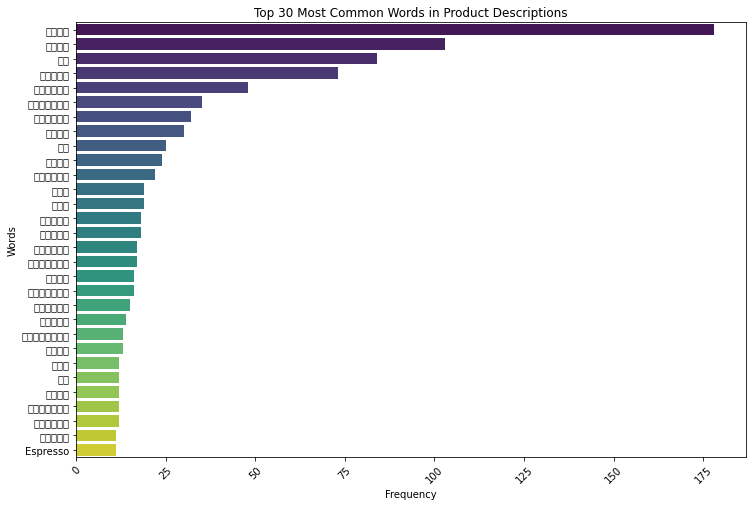

Top Words for Plotting:
[('กาแฟ', 178), ('คั่ว', 103), ('บด', 84), ('เมล็ด', 73), ('รสชาติ', 48), ('เครื่อง', 35), ('ลูกค้า', 32), ('ร้าน', 30), ('ชง', 25), ('เข้ม', 24), ('ชงกาแฟ', 22), ('หอม', 19), ('ถุง', 19), ('ระดับ', 18), ('กลิ่น', 18), ('สินค้า', 17), ('ดอยช้าง', 17), ('กลาง', 16), ('ละเอียด', 16), ('คุณภาพ', 15), ('ขนส่ง', 14), ('กลิ่นหอม', 13), ('ราคา', 13), ('ตัว', 12), ('ดี', 12), ('อ่อน', 12), ('เปรี้ยว', 12), ('กาแฟสด', 12), ('ละมุน', 11), ('Espresso', 11)]


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top words and their frequencies
top_words = word_freq.most_common(30)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for word, count in top_words], y=[word for word, count in top_words], palette="viridis")

# Customize the plot
plt.title("Top 30 Most Common Words in Product Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.xticks(rotation=45)

# Show the plot
plt.show()
print("Top Words for Plotting:")
print(top_words)

# scatterplot

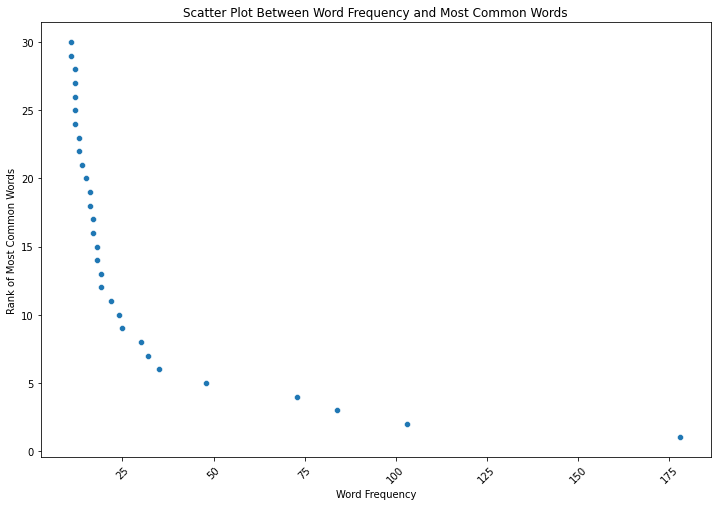

Top Words for Plotting:
[('กาแฟ', 178), ('คั่ว', 103), ('บด', 84), ('เมล็ด', 73), ('รสชาติ', 48), ('เครื่อง', 35), ('ลูกค้า', 32), ('ร้าน', 30), ('ชง', 25), ('เข้ม', 24), ('ชงกาแฟ', 22), ('หอม', 19), ('ถุง', 19), ('ระดับ', 18), ('กลิ่น', 18), ('สินค้า', 17), ('ดอยช้าง', 17), ('กลาง', 16), ('ละเอียด', 16), ('คุณภาพ', 15), ('ขนส่ง', 14), ('กลิ่นหอม', 13), ('ราคา', 13), ('ตัว', 12), ('ดี', 12), ('อ่อน', 12), ('เปรี้ยว', 12), ('กาแฟสด', 12), ('ละมุน', 11), ('Espresso', 11)]


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace this with your data)
word_freq = [178, 103, 84, 73, 48, 35, 32, 30, 25, 24, 22, 19, 19, 18, 18, 17, 17, 16, 16, 15, 14, 13, 13, 12, 12, 12, 12, 12, 11, 11]
most_common = list(range(1, 31))  # A list of integers from 1 to 30

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=word_freq, y=most_common)

# Customize the plot
plt.title("Scatter Plot Between Word Frequency and Most Common Words")
plt.xlabel("Word Frequency")
plt.ylabel("Rank of Most Common Words")
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability

# Show the plot
plt.show()
print("Top Words for Plotting:")
print(top_words)

In [108]:
#ขนาดของจุดไม่เท่ากัน
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

NameError: name 'tips' is not defined

In [109]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [110]:
from collections import Counter
import pandas as pd
import math
from tabulate import tabulate

In [111]:
from collections import Counter
import pandas as pd
import math

flat_tokens = [word for tokens in data3['Token'] for word in tokens if word != ' ']

# นับความี่
tf_counter = Counter(flat_tokens)

# คำนวณจำนวนทั้งหมด
total_documents = len(data3)  

# คำนวณ IDF
idf_values = {}
for term, tf in tf_counter.items():
    idf = math.log10(total_documents / (1 + tf))  
    idf_values[term] = idf

# สร้าง DataFrame ด้วยค่า TF และ IDF
tf_df = pd.DataFrame(tf_counter.items(), columns=['Word', 'TF'])
tf_df['IDF'] = tf_df['Word'].map(idf_values)

# คำนวณ TF-IDF และเพิ่มลงใน DataFrame
tf_df['TF-IDF'] = tf_df['TF'] * tf_df['IDF']

# จัดเรียงตาม TF-IDF ตามลำดับจากน้อยไปมาก
tf_df = tf_df.sort_values(by='TF-IDF', ascending=True)


print(tabulate(tf_df, headers='keys', tablefmt='pretty', showindex=False))

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----------------------+----------------------+
|                                                                                      Word                                                                                      | TF  |         IDF          |        TF-IDF        |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----------------------+----------------------+
|                                                                                      กาแฟ                                                                                      | 178 |  -1.252853030979893  | -223.00783951442097  |
|                                                                           

-คำ (Word): คอลัมน์นี้เก็บคำศัพท์แต่ละคำจากชุดข้อมูลของคุณโดยแต่ละคำถูกแสดงในแถวแยกกัน.

-TF (ความถี่ของคำ): TF แทนการปรากฏของแต่ละคำในชุดข้อมูลของคุณ 
แสดงถึงความถี่ของแต่ละคำในชุดข้อมูลทั้งหมด.

-IDF (ความถี่สำหรับเอกสารแสดงถึงความเฉพาะของคำหรือความสำคัญของคำในบริบท
ของชุดข้อมูลทั้งหมด มีการคำนวณโดยใช้ฟังก์ชันลอการิทึมโดยความถี่ของเอกสารทั้งหมดหาร
ด้วยจำนวนเอกสารที่มีคำนั้นๆ

-TF-IDF (ความถี่ของคำแบบถกหนิ) **: TF-IDF เป็นผลคูณของ TF และ IDF 
มีวัตถุประสงค์เพื่อประเมินความสำคัญของคำในเอกสารที่ระบุเทียบกับความถี่ของคำทั่วทั้งชุดข้อมูล
คำที่มีคะแนน TF-IDF สูงแสดงถึงความสำคัญมากในบริบทของเอกสาร

*ใน DataFrameและแถวที่สอดคล้องกับคำแต่ละคำ และคอลัมน์ระบุข้อมูลเกี่ยวกับความถี่ของคำ 
เวลาดอกเบี้ยของเอกสารและคะแนน TF-IDF สำหรับคำนั้นในชุดข้อมูล DataFrame 
จะถูกเรียงลำดับในลำดับของค่า TF-IDF ตามลำดับจากต่ำไปสูง นั่นคือค่า TF-IDF 
ที่ต่ำที่สุดจะปรากฏก่อนเป็นไปได้ คุณสามารถวิเคราะห์ข้อมูลนี้ต่อเพื่อระบุคำที่สำคัญที่สุดและ
ไม่สำคัญที่สุดในชุดข้อมูลของคุณโดยใช้คะแนน TF-IDF ของพวกเขา




